In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_classification

from sklearn.model_selection import cross_val_score, KFold

from sklearn.ensemble import StackingClassifier

In [2]:
def get_datasets():
    X, y = make_classification(n_samples= 1000, n_features= 20, n_informative= 15, n_redundant= 5, random_state = 1)
    return X,y
X,y = get_datasets()

In [3]:
def get_models():
    models = dict() #list() # append
    models.update({'KNeighborsClassifier': KNeighborsClassifier()})
    models.update({'LogisticRegression': LogisticRegression()})
    models.update({'DecisionTreeClassifier': DecisionTreeClassifier()})
    
    return models
models = get_models()

In [4]:
def evaluate_model(model, X, y):
    cv = KFold(n_splits= 10)
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
    return scores

KNeighborsClassifier, 0.9247968571789311, 0.03602116142341796
LogisticRegression, 0.8703054478134383, 0.021502428463896807
DecisionTreeClassifier, 0.824456345099075, 0.027159089646442588


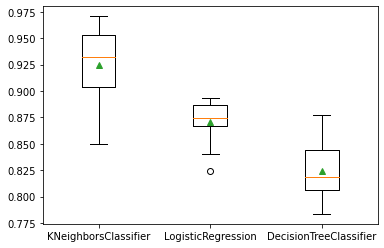

In [5]:
results,names = [ ], [ ]
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name}, {np.mean(scores)}, {np.std(scores)}')

    
plt.boxplot(results, labels = names, showmeans= True)
plt.show()

In [6]:
def get_stacking():
    ## definir los modelos base
    level0 = list()
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('dt', DecisionTreeClassifier()))
    
    level1 = LogisticRegression()
    
    ## definir el stacking - ensemble 
    model = StackingClassifier(estimators= level0, final_estimator=level1, cv = 5)
    return model

In [7]:
def get_models():
    models = dict() #list() # append
    models.update({'KNeighborsClassifier': KNeighborsClassifier()})
    models.update({'LogisticRegression': LogisticRegression()})
    models.update({'DecisionTreeClassifier': DecisionTreeClassifier()})
    models.update({'StackingClassifier': get_stacking()})
    return models
models = get_models()

KNeighborsClassifier, 0.9247968571789311, 0.03602116142341796
LogisticRegression, 0.8703054478134383, 0.021502428463896807
DecisionTreeClassifier, 0.8398714774983912, 0.02591067547273263
StackingClassifier, 0.9356303998271673, 0.02809150442940167


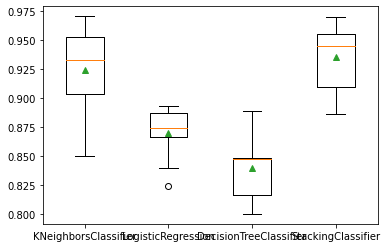

In [8]:
results,names = [ ], [ ]
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f'{name}, {np.mean(scores)}, {np.std(scores)}')

    
plt.boxplot(results, labels = names, showmeans= True)
plt.show()